# 3115-Lab Programming Machine Learning

### Lab Exercise 5

### Yuvaraj Prem Kumar, 303384

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Pre-processing

We have three datasets, (1) Bank, (2) Red Wine, and (3) White Wine. These are identified by df_1, df_2, and df_3 respectively.

**1.1 Bank Dataset**

From [1], "the data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed."

So the output here is a binary decision (Yes/No). Hence for linear classification, we can model this as a logistic regression.  Since this is a logistic regression model, the predicted outputs are binary '1' or '0' for the classification - hence the target column will be converted accordingly.

Steps for data preprocessing:

1. *Encode categorical variables as numeric*: Using pandas get_dummies() function.
2. *Encode binary data*: Change values to {0, 1}
3. *Encode target categorical variable*: As mentioned, the target categorical variable must be changed from {yes, no} to {0, 1}.
4. *Normalize datasets*: The X component (observations) for train and test will be normalized. This means the adjusted values will be between 0 & 1. This prevents the sigmoid function from overflowing /  underflowing due to large $\hat{y_i}$.
5. *Train/test split*: 80% train and 20% test.

Here, we have several helper functions to help with data pre-processing:

In [2]:
# Function for missing or NA values, adapted from my previous labs
def checknull(dataframe):
    i = dataframe.isnull().sum().sum()
    if i == 0:
        print('No NaN values in dataset')
    else:
        print('NaN values found:', i)
        

# Column-wise normalization, adapted from [3]
def normalize(x):
    '''We should just normalize the "X" aka observations'''
    return (x-np.min(x))/(np.max(x)-np.min(x))


# Insert column of "ones" to first index column, "try" helps with reruns
def add_bias(dfx):
    if 'bias' not in dfx.columns:
        return dfx.insert(0, "bias", 1) 
    else:
        return print("Bias column already exists")
        
        
# Train / test split of 80% / 20%, code from my previous labs
def train_test_split(dfx, dfy):
    mask = np.random.rand(len(dfx)) < 0.8
    x_train, y_train = dfx[mask], dfy[mask]
    x_test, y_test = dfx[~mask], dfy[~mask]
    
    x_train = x_train.to_numpy()  # Unpack dataframe to numpy arrays
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    x_test = x_test.to_numpy()
    
    print('\nShape of x_train:', x_train.shape, ';', 'Shape of y_train:', y_train.shape)
    print('\nShape of x_test:', x_test.shape, ';', 'Shape of y_test:', y_test.shape)
    
    return x_train, y_train, x_test, y_test

In [3]:
df1 = pd.read_csv('bank.csv', sep = ';')
print("Bank Dataset:", df1.shape[0], "rows X", df1.shape[1], "columns")
df1.head(3)

Bank Dataset: 4521 rows X 17 columns


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [4]:
# Check for missing values
checknull(df1)

No NaN values in dataset


In [5]:
# Discovering datatypes
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


As we can see, there are many non-numerical columns, which need to be processed before being feed into the model

In [6]:
# Split into X and Y components now to avoid pd.get_dummies() from encoding target column Y
df1_x = df1.iloc[:,:16]
for col in ['default', 'housing', 'loan']:
    df1_x[col] = df1_x[col].map(dict(yes=1, no=0))  # Convert to binary 1 and 0
    
df1_x = pd.get_dummies(df1_x)
df1_x = df1_x.apply(lambda x: normalize(x), axis=0) # Calling the normalize function
add_bias(df1_x)
df1_x.head(3)

,bias,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0.161765,0.0,0.068455,0.0,0.0,0.600000,0.024826,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0.205882,0.0,0.108750,1.0,1.0,0.333333,0.071500,0.0,0.389908,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0.235294,0.0,0.062590,1.0,0.0,0.500000,0.059914,0.0,0.379587,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
df1_y = df1.iloc[:, -1]  # Target
df1_y = df1_y.apply(lambda x : 1 if x == "yes" else 0)  # Convert to binary 1 and 0
df1_y.head(3)

0    0
1    0
2    0
Name: y, dtype: int64

In [8]:
x_train1, y_train1, x_test1, y_test1 = train_test_split(df1_x, df1_y)


Shape of x_train: (3605, 49) ; Shape of y_train: (3605,)

Shape of x_test: (916, 49) ; Shape of y_test: (916,)


**1.2 Wine Dataset**

The pre-processing steps follow as in 1.1, and they are also the same steps as per Lab 3. There are no differences in the approach for "White" and "Red" datasets, as they both have exactly the same format. I choose not to combine both datasets into one, as that would need an extra column to identify the origin, and defeat the original purpose of having two separate datasets in the first place. Both are fully numeric, so no categorical encoding is necessary.

In [9]:
def wine_preprocessing(wine_csv, title, target):
    df = pd.read_csv(wine_csv, sep = ';')
    print(title, df.shape[0], "rows X", df.shape[1], "columns")
    checknull(df)
    
    
    x_df = df.drop([target], axis=1)
    x_df = x_df.apply(lambda x: normalize(x), axis=0) # Calling the normalize function
    add_bias(x_df)
    
    y_df = df[target]
    
    print(x_df.head(3))
    print(y_df.head(3))
    
    x_train, y_train, x_test, y_test = train_test_split(x_df, y_df)
    return x_train, y_train, x_test, y_test

In [10]:
# Red wine dataset
x_train2, y_train2, x_test2, y_test2 = wine_preprocessing('winequality-red.csv', 'Red Wine Dataset:', 'quality')

Red Wine Dataset: 1599 rows X 12 columns
No NaN values in dataset
   bias  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1       0.247788          0.397260         0.00        0.068493   
1     1       0.283186          0.520548         0.00        0.116438   
2     1       0.283186          0.438356         0.04        0.095890   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0   0.106845             0.140845              0.098940  0.567548  0.606299   
1   0.143573             0.338028              0.215548  0.494126  0.362205   
2   0.133556             0.197183              0.169611  0.508811  0.409449   

   sulphates   alcohol  
0   0.137725  0.153846  
1   0.209581  0.215385  
2   0.191617  0.215385  
0    5
1    5
2    5
Name: quality, dtype: int64

Shape of x_train: (1282, 12) ; Shape of y_train: (1282,)

Shape of x_test: (317, 12) ; Shape of y_test: (317,)


In [11]:
# White wine dataset
x_train3, y_train3, x_test3, y_test3 = wine_preprocessing('winequality-white.csv', 'White Wine Dataset:', 'quality')

White Wine Dataset: 4898 rows X 12 columns
No NaN values in dataset
   bias  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1       0.307692          0.186275     0.216867        0.308282   
1     1       0.240385          0.215686     0.204819        0.015337   
2     1       0.413462          0.196078     0.240964        0.096626   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0   0.106825             0.149826              0.373550  0.267785  0.254545   
1   0.118694             0.041812              0.285383  0.132832  0.527273   
2   0.121662             0.097561              0.204176  0.154039  0.490909   

   sulphates   alcohol  
0   0.267442  0.129032  
1   0.313953  0.241935  
2   0.255814  0.338710  
0    6
1    6
2    6
Name: quality, dtype: int64

Shape of x_train: (3947, 12) ; Shape of y_train: (3947,)

Shape of x_test: (951, 12) ; Shape of y_test: (951,)


# 2. Linear Classification with Gradient Descent

## 2.1 Ridge Regression / L2 Regularization

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients [5]. This is basically a constraint on the coefficients ($\beta$). The penalty term ($\lambda$) regularizes the $\beta$ such that if $\beta$ take large values, the optimization function is penalized. So, ridge regression shrinks the $\beta$ in turn. This helps to reduce the model complexity and multi-collinearity.

<img src="https://i.imgur.com/NL18q7e.jpg" width="50%"/>

For the Bank dataset, it is a classification task, so we can use logistic regression model here to predict the target of Yes / No. The loss here would be the logloss, which is also the negative of loglikelihood (since we want to maximize the loglikelihood in logistic regression, using mini-batch gradient ascent technique). 

For the two Wine datasets, the target is continuous, so we can model it as multivariate linear regression. We will use the linear regression with (mini-batch) gradient descent, to minimize the RMSE loss.

## 2.3 Mini-batch Gradient Descent

Mini-batch gradient descent (or ascent) is a trade-off between stochastic gradient descent and batch gradient descent [7]. The cost function (and gradient) is averaged over a small number of samples, here batchsize = 50. Whereas in SGD we use a batch size of 1 sample randomly shuffled, and in regular batch GD the size of all the training samples. The reasoning is that, it smooths out some of the noise in SGD, but still able to jump out of local minimums of the cost function. Also the mini-batch size is still small, thereby keeping the performance benefits of SGD somewhat.

In [12]:
# Adapted from [7]
def get_mini_batches(X, y, batch_size):
    random_idxs = np.random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs,:]
    y_shuffled = y[random_idxs]
    mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, len(y), batch_size)]
    return mini_batches

## 2.2 Bank dataset - Logistic regression

In [13]:
'''
The following helper functions are from my Lab 4, also note the introduction of L2 loss, 
explained in the next cell.
'''

def sigmoid(X, beta):
    z = np.matmul(beta, X.T)
    return 1 / (1 + np.exp(-z))


# Logloss is also the negative of loglikelihood
def logloss(X, y, beta, lambd):
    z = np.matmul(beta, X.T)
    ls = -(np.sum(y*z - np.log(1 + np.exp(z))) + lambd*(beta.T*beta))  # L2 loss
    return ls


def log_bolddriver(x, y_hat_old, y_hat_new, alpha, beta, lambd): 
    '''
    If f(x) value increases, then decrease alpha (step-size), and vice-versa. Normally this is for loglikelihood, since we are
    using logloss here, the equality is flipped over to logloss_old > logloss_new. 
    '''
    ls_old = logloss(x, y_hat_old, beta, lambd)
    ls_new = logloss(x, y_hat_new, beta, lambd)

    if (ls_old[0] - ls_new[0]) >= 0:
        alpha *= 0.5  
    else:
        alpha *= 1.1  
    return alpha

The algorithm for learning logistic regression via gradient ascent is exactly the same as my Lab 4, except now we introduce the L2 regularization / Ridge regression. This is via the regularization parameter, $\lambda$ in the calculation of loglikelihood, and $\beta$ update in the gradient ascent.

<img src="https://i.imgur.com/rwxKM88.jpg" width="50%"/>

In [14]:
def learn_reglogreg_ga(xtrain, ytrain, xtest, ytest, epoch, alpha, lambd, steplength = None):
    
    '''
    
    This function takes as calculates the logloss on training and testing dataset, and updates beta parameters
    via mini-batch gradient ascent. It stores the logloss history for plotting purposes. Alpha history is to see how 
    the bold-driver step length controller changes the value.
    
    '''
    
    beta = np.zeros(xtrain.shape[1])
    
    residual, ls_train_hist, ls_test_hist, alpha_hist = [], [], [], []
    
    # Calculate initial y_hat on train set
    prev_ytrain_hat = sigmoid(xtrain, beta)
    ls_train = logloss(xtrain, prev_ytrain_hat, beta, lambd)  # Initial logloss on train set
    ls_train_hist.append(ls_train)
    
    # Calculate initial y_hat on test set
    prev_ytest_hat = sigmoid(xtest, beta)    
    ls_test = logloss(xtest, prev_ytest_hat, beta, lambd)  # Initial logloss on test set
    ls_test_hist.append(ls_test)
    
    alpha_hist.append(alpha)
                               
    for i in range(epoch):
        mini_batches = get_mini_batches(xtrain, ytrain, 50)  # Given the fixed batchsize of 50
        for m in mini_batches:  # Adapted from [7]
            xtrain_k = m[0]
            ytrain_k = m[1]
            
            y_hat = sigmoid(xtrain_k, beta)
            gradient = np.dot(xtrain_k.T, (ytrain_k-y_hat))
            beta = beta + alpha*gradient - 2*lambd*beta   # L2 Regularization


            try:
                # Calculate log-loss on train set
                ytrain_hat = sigmoid(xtrain, beta)
                ls_train = logloss(xtrain, ytrain_hat, beta, lambd)
                ls_train_hist.append(ls_train)
                
                prev_ytrain_hat = ytrain_hat
                    
                # Calculate log-loss on test set    
                ytest_hat = sigmoid(xtest, beta)
                ls_test = logloss(xtest, ytest_hat, beta, lambd)
                ls_test_hist.append(ls_test)           
              
                prev_ytest_hat = ytest_hat
            
                # Calculate residuals on test set
                f_diff = np.abs(ls_test_hist[-1] - ls_test_hist[-2])
                residual.append(f_diff)
            
            except:
                print("Function diverged after iteration #", m, "in epoch #", i)
                break  
            
            # Update learning rate using bold-driver
            if steplength == 'Bold_driver':
                y_hat_new = sigmoid(xtrain_k, beta)
                alpha = log_bolddriver(xtrain_k, y_hat, y_hat_new, alpha, beta, lambd)
                y_hat = y_hat_new
            alpha_hist.append(alpha)
        
    return beta, residual, ls_train_hist, ls_test_hist, alpha_hist    

In [15]:
def pred_plot(residual, logloss_train, logloss_test, title):
    
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(title, fontsize=20)
    
    fig.add_subplot(1,3,1)
    plt.plot(logloss_train, color = 'Blue')
    plt.title("Logloss on train-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    fig.add_subplot(1,3,2)
    plt.plot(logloss_test, color = 'Red')
    plt.title("Logloss on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    fig.add_subplot(1,3,3)
    plt.plot(residual,  color = 'Green')
    plt.title("Change in Function Value |f(x) - f(x−1)| on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    plt.show()

The function "learn_reglogreg_ga" is called with varying values of step-size $\alpha$ and regularization parameter $\lambda$.
So the model will be trained in varying combinations of $\alpha$ and $\lambda$, a total of 9 scenarios and their accompanying graphs.

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.01


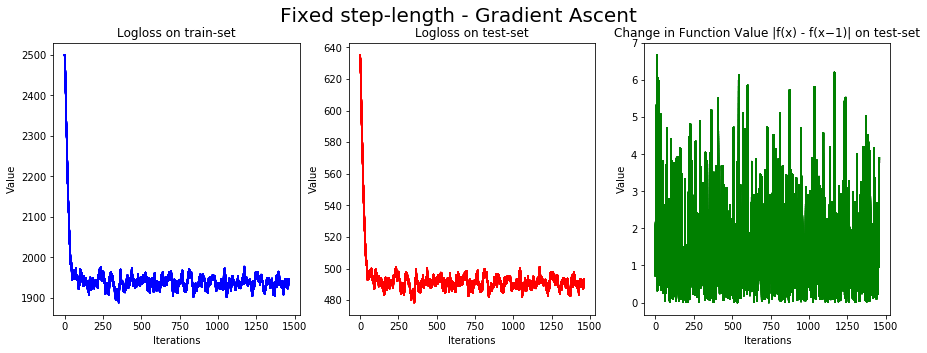

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.001


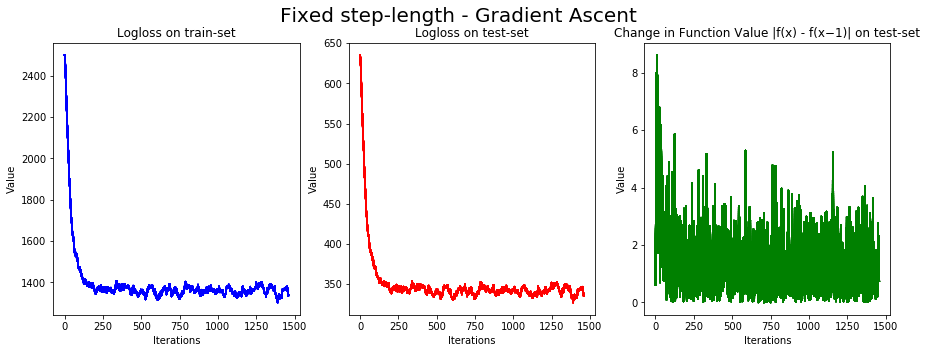

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.0001


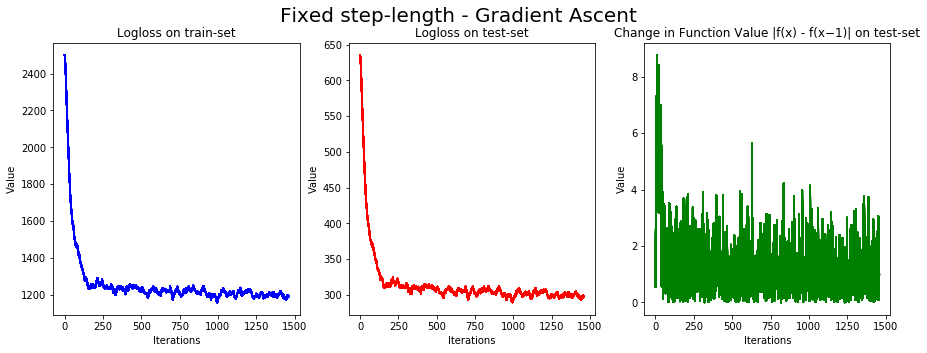

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.01


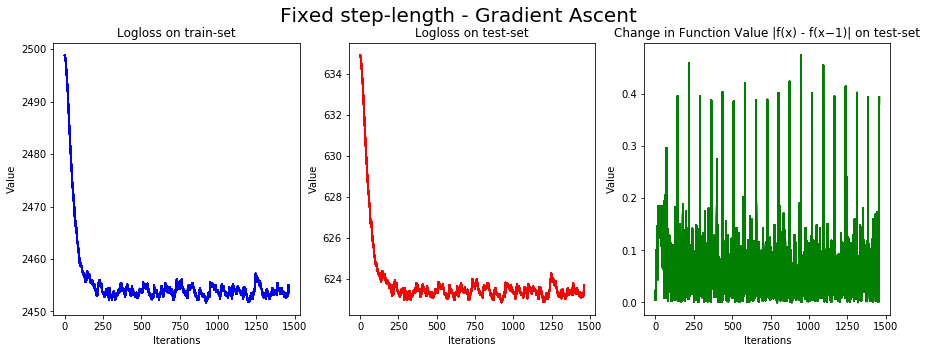

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.001


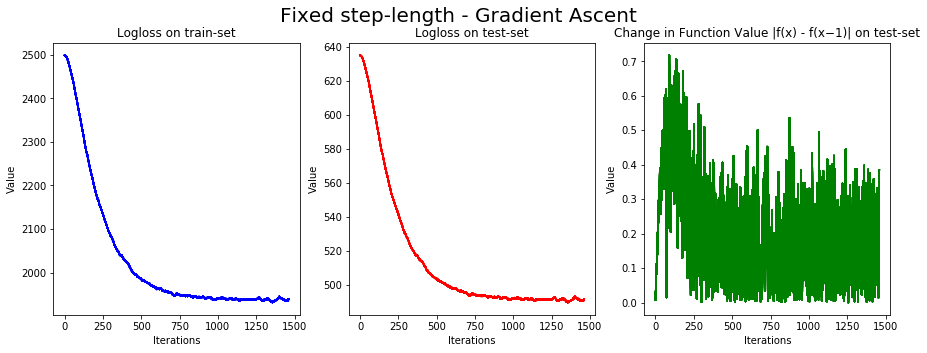

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.0001


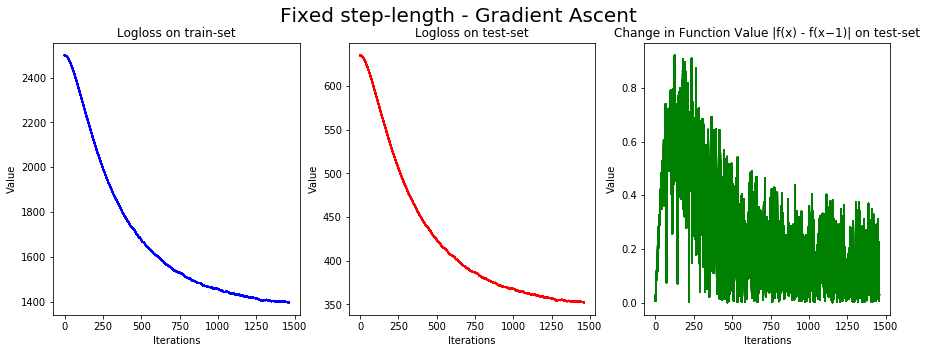

 
When Learning Rate =  1e-05  and Regularization Weight, 𝜆 =  0.01


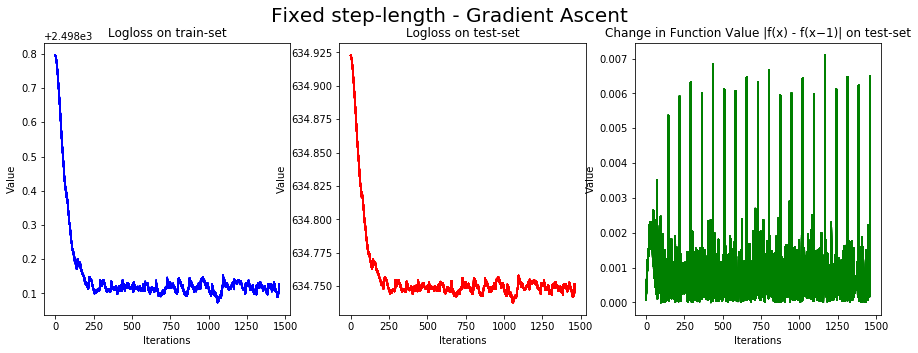

 
When Learning Rate =  1e-05  and Regularization Weight, 𝜆 =  0.001


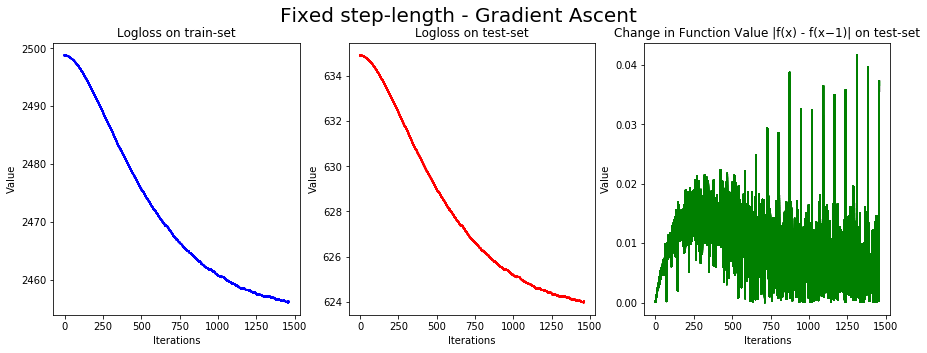

 
When Learning Rate =  1e-05  and Regularization Weight, 𝜆 =  0.0001


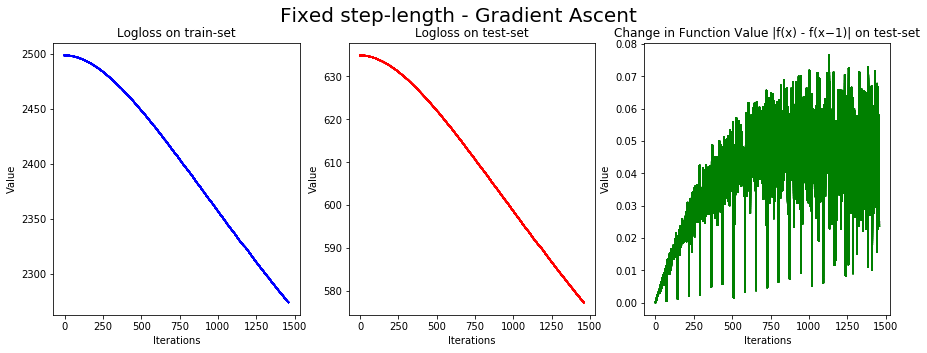

In [16]:
epoch = 20
alpha = [0.001, 0.0001, 0.00001]
lambd = [0.01, 0.001, 0.0001]

for i in range(len(alpha)):
    for j in range(len(lambd)):
        print("\033[1m \nWhen Learning Rate = \033[0m", alpha[i], "\033[1m and Regularization Weight, 𝜆 = \033[0m", lambd[j])
        beta, residual, logloss_train, logloss_test, alpha_hist = learn_reglogreg_ga(x_train1, 
                                                                                     y_train1,    
                                                                                     x_test1, 
                                                                                     y_test1, 
                                                                                     epoch, 
                                                                                     alpha[i], 
                                                                                     lambd[j])
        pred_plot(residual, logloss_train, logloss_test, "Fixed step-length - Gradient Ascent")

The plots for loss were suggested to be in one, but due to the difference in min / max values for logloss in train and test set, I decide on separate plots for better visualization. We can observe the following:

* For all plots, a very small value of L2 regularization parameter, $\lambda$ of 0.0001 seems to be the optimum value here. 
* However, the main hyperparameter here is the learning rate, $\alpha$ as it has a much greater effect on the logloss and eventual convergence.
* The "best" combination which is able to converge smoothly is $\alpha$ = 0.0001 and $\lambda$ = 0.0001. It doest not require many iterations to achieve this.
* A too small learning rate leads to a very slow convergence as expected even after 20 epochs.
* As compared to Lab 4, adding a suitable L2 regularization gives a better convergence. However direct comparison is difficult as it was a different dataset and SGD as compared to mini-batch GD.
* The change in function value is as expected, it is not as "noisy" as SGD, but still have some jitter as the function is adjusting to the changing $\beta$ 

The same model is run, this time using the Bold-driver step length controller. Here we can investigate the effect of it in conjunction with the L2 regularization term.

 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.0001


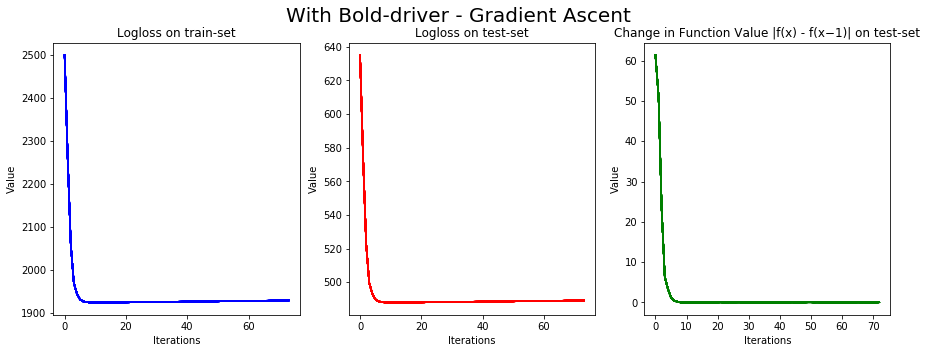

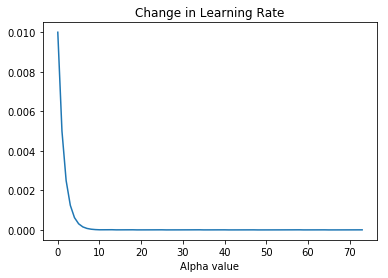

Final value of alpha: 7.212033938265949e-06
 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.001


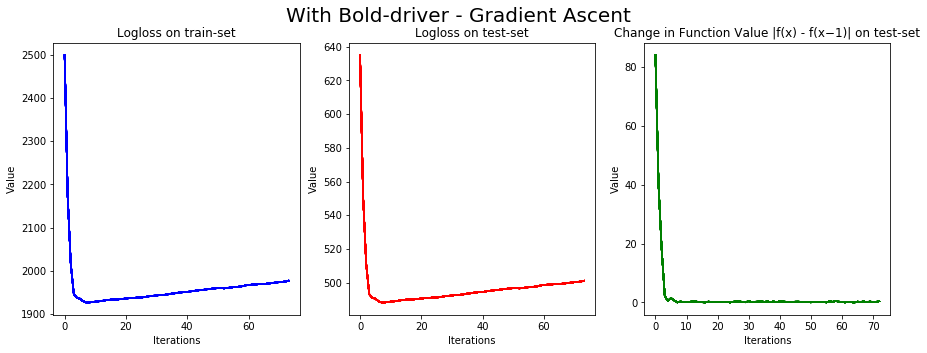

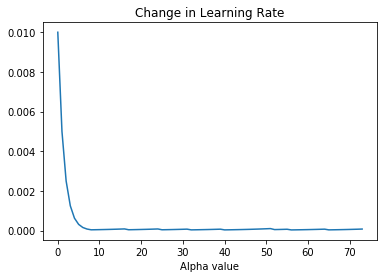

Final value of alpha: 7.679373737465584e-05
 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.01


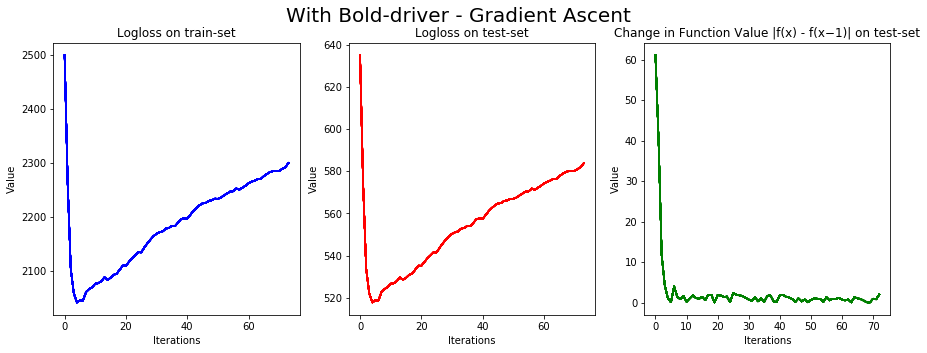

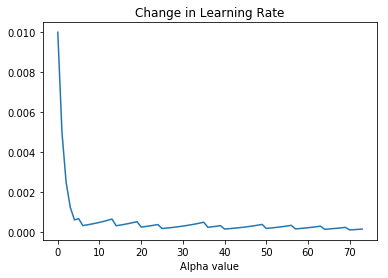

Final value of alpha: 0.00016894622222424286
 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.0001


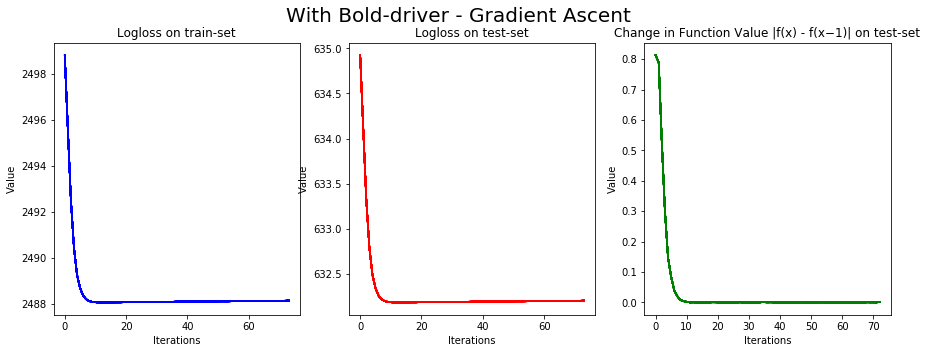

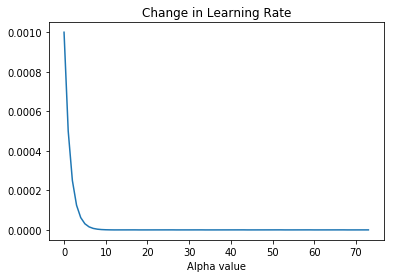

Final value of alpha: 3.278197244666342e-07
 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.001


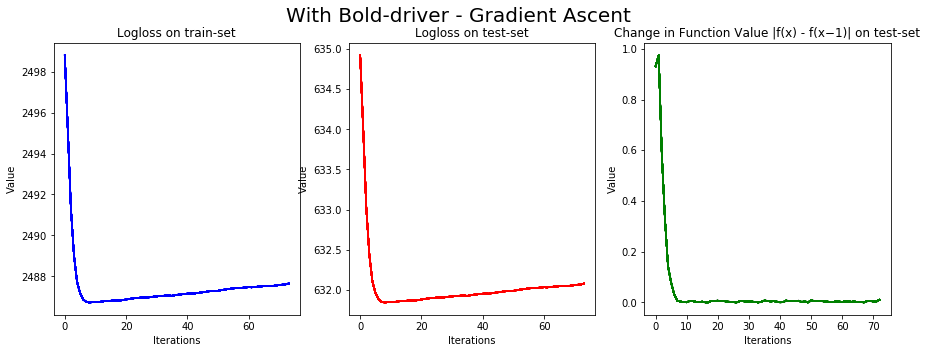

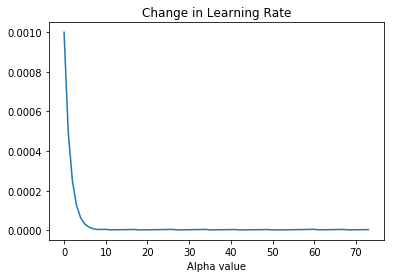

Final value of alpha: 3.490624426120722e-06
 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.01


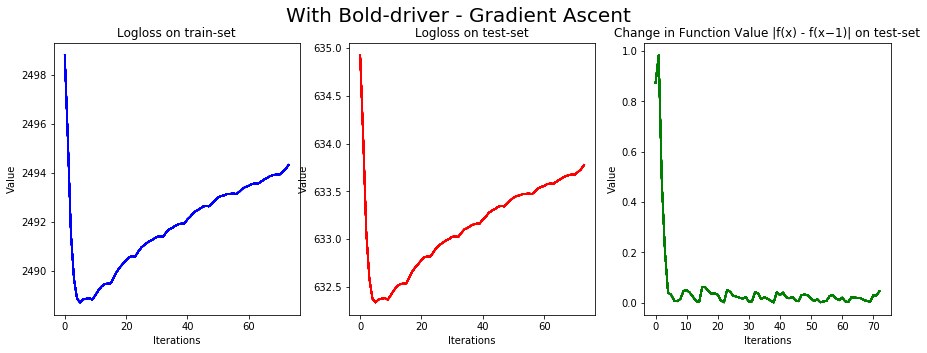

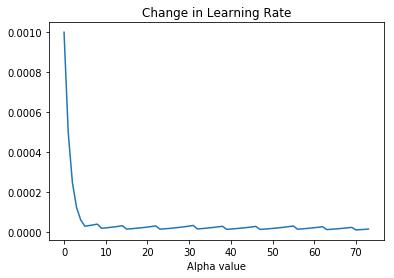

Final value of alpha: 1.68946222224243e-05
 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.0001


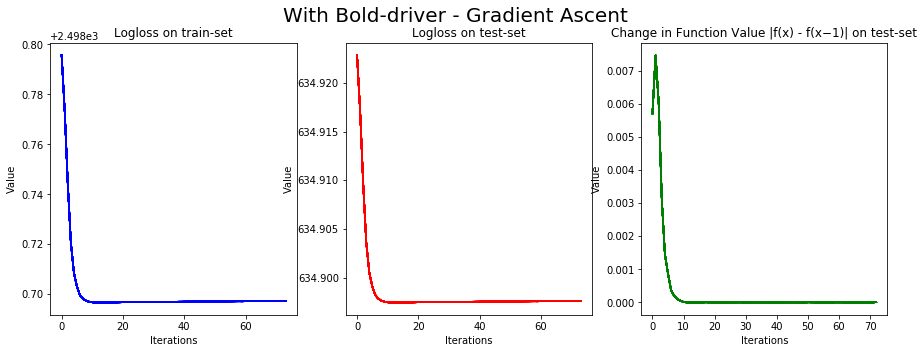

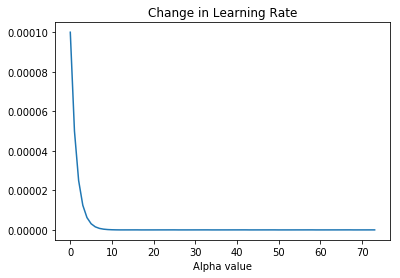

Final value of alpha: 3.278197244666341e-08
 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.001


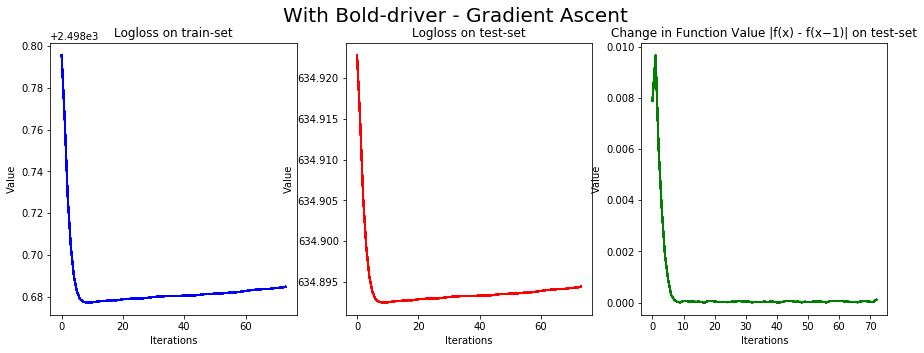

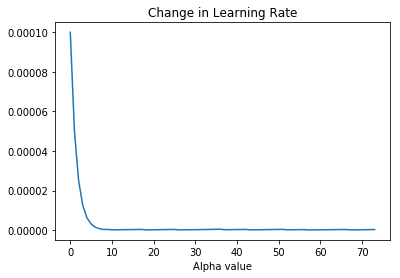

Final value of alpha: 3.4906244261207204e-07
 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.01


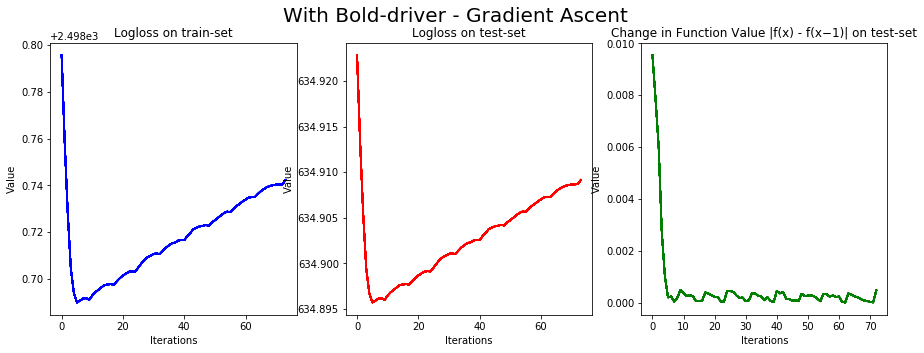

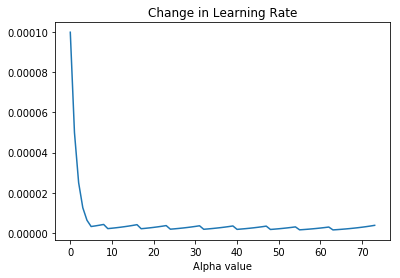

Final value of alpha: 3.716816888933344e-06


In [17]:
epoch = 1
alpha = [0.01, 0.001, 0.0001]
lambd = [0.0001, 0.001, 0.01]

for i in range(len(alpha)):
    for j in range(len(lambd)):
        print("\033[1m \nWhen Learning Rate = \033[0m", alpha[i], "\033[1m and Regularization Weight, 𝜆 = \033[0m", lambd[j])
        beta, residual, logloss_train, logloss_test, alpha_hist = learn_reglogreg_ga(x_train1, 
                                                                                          y_train1,    
                                                                                          x_test1, 
                                                                                          y_test1, 
                                                                                          epoch, 
                                                                                          alpha[i], 
                                                                                          lambd[j],
                                                                                          steplength='Bold_driver')
        pred_plot(residual,logloss_train,logloss_test, "With Bold-driver - Gradient Ascent")
        
        # Plot alpha values to see how bold-driver update works
        plt.plot(alpha_hist)
        plt.title("Change in Learning Rate")
        plt.xlabel("Iterations")
        plt.xlabel("Alpha value")
        plt.show()

        print("Final value of alpha:", alpha_hist[-1])

* As expected, the convergence is much faster here using bold-driver to iteratively update the step-size $\alpha$. In fact we only require 1 epoch to see it 
* For all plots, a very small value of L2 regularization parameter, $\lambda$ of 0.0001 seems to be the optimum value here. 
* However, the main hyperparameter here is the learning rate, $\alpha$ as it has a much greater effect on the logloss and eventual convergence.
* The "best" combination which is able to converge smoothly is $\alpha$ = 0.001 and $\lambda$ = 0.0001. It doest not require many iterations to achieve this.
* A larger value of $\lambda$  leads to the loss function diverging.

## 2.4 Wine dataset - Linear Regression

The code is adapted from my Lab 3, with the addition of L2 loss and L2 regularization

<img src="https://i.imgur.com/us8rxzD.jpg" width="50%"/>

Here, we will minimize the RMSE via mini-batch gradient descent.

In [18]:
'''
Helper functions from my Lab 3: 
1. Predicted value, y_hat; 
2. Least squares loss; 
3. RMSE between ground truth and predicted value
'''

def predict(X, beta):
    y_hat = np.matmul(X,beta)
    return y_hat


def least_squares_loss(prev_y_hat, y_hat):
    lss = np.sum(np.abs(prev_y_hat - y_hat))
    return lss


def rmse_calc(y, y_hat):
    rmse = np.sqrt((np.sum(np.square(y - y_hat))) / len(y))
    return rmse

In [19]:
def pred_plot2(rmse_train_hist, rmse_test_hist, residual, title):
    
    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(title, fontsize=20)
    
    fig.add_subplot(1,3,1)
    plt.plot(rmse_train_hist, color = 'Blue')
    plt.title("RMSE on train-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    fig.add_subplot(1,3,2)
    plt.plot(rmse_test_hist, color = 'Red')
    plt.title("RMSE on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    fig.add_subplot(1,3,3)
    plt.plot(residual, color = 'Green')
    plt.title("Change in Function Value |f(x) - f(x−1)| on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")

    plt.show()

In [24]:
def learn_ridgereg_gd(xtrain, ytrain, xtest, ytest, epoch, alpha, lambd):

    beta = np.zeros(xtrain.shape[1])
    
    residual, rmse_train_hist, rmse_test_hist = [], [], []
    
    # Calculate initial rmse on train set
    prev_ytrain_hat = predict(xtrain, beta)
    rmse_train_old = rmse_calc(ytrain, prev_ytrain_hat)
    rmse_train_hist.append(rmse_train_old)
    

    # Calculate initial rmse on test set
    prev_ytest_hat = predict(xtest, beta)    
    rmse_test_old = rmse_calc(ytest, prev_ytest_hat)
    rmse_test_hist.append(rmse_test_old)
    
                               
    for i in range(epoch):
        mini_batches = get_mini_batches(xtrain, ytrain, 50)  # Given the fixed batchsize of 50
        for m in mini_batches:  # Adapted from [7]
            xtrain_k = m[0]
            ytrain_k = m[1]
            
            y_hat = predict(xtrain_k, beta)
            gradient = -2 * np.dot(xtrain_k.T, (ytrain_k - y_hat))
            beta = beta - alpha * gradient + 2*lambd*beta  # L2 regularization

            
            try:
                # Calculate rmse on train set
                ytrain_hat = predict(xtrain, beta)
                rmse_train = rmse_calc(ytrain, ytrain_hat)
                rmse_train_hist.append(rmse_train)
                    
                # Calculate rmse on test set    
                ytest_hat = predict(xtest, beta)    
                rmse_test = rmse_calc(ytest, ytest_hat)
                rmse_test_hist.append(rmse_test) 
                
                

                # Calculate residuals on test set
                lss = least_squares_loss(prev_ytest_hat, ytest_hat)
                prev_ytest_hat = ytest_hat
                residual.append(lss)
                
            
            except:
                print("Not converged in i_max iterations of", i)
                break  
                  
    return beta, residual, rmse_train_hist, rmse_test_hist

## 2.5 Red Wine Dataset 

 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.0001


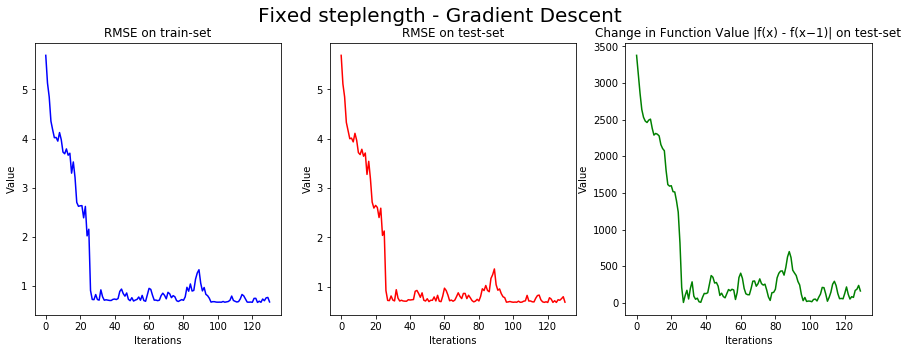

 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.001


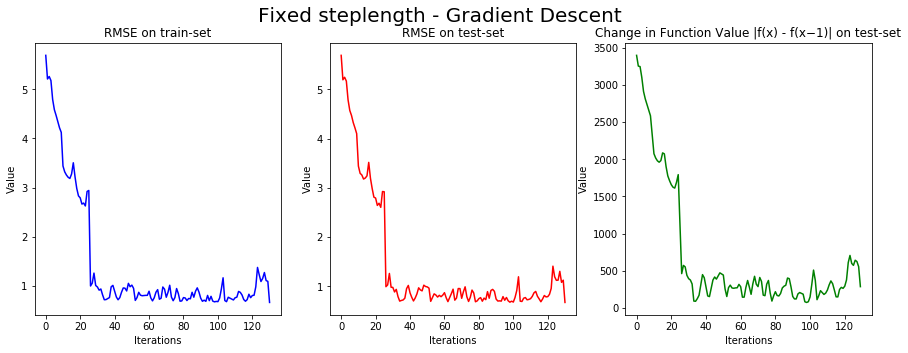

 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.01


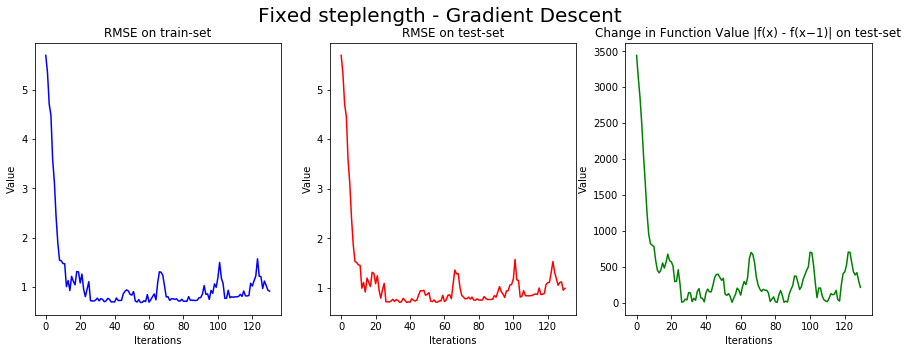

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.0001


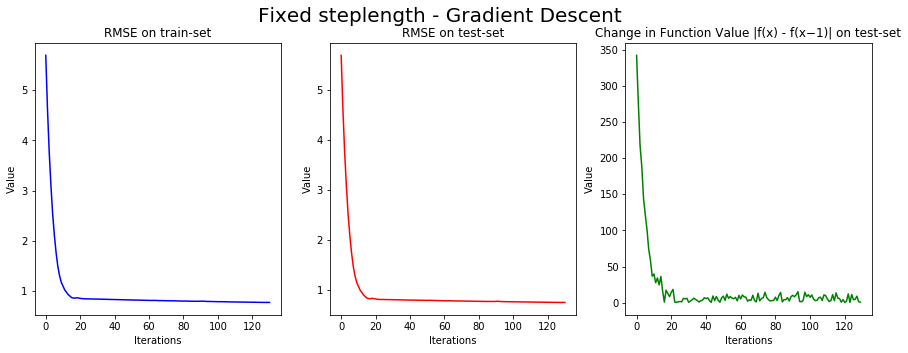

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.001


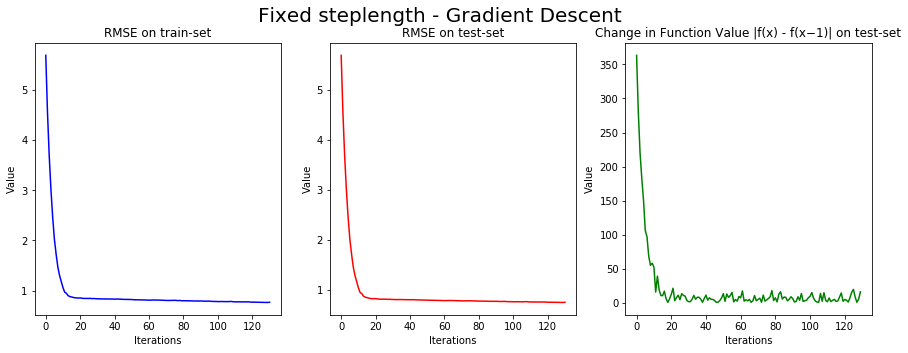

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.01


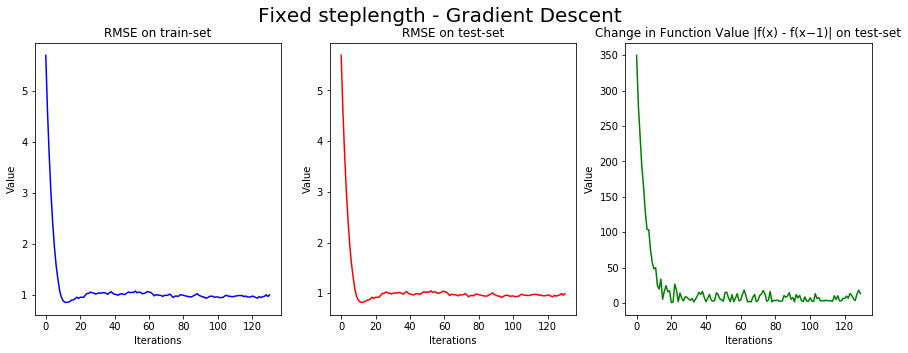

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.0001


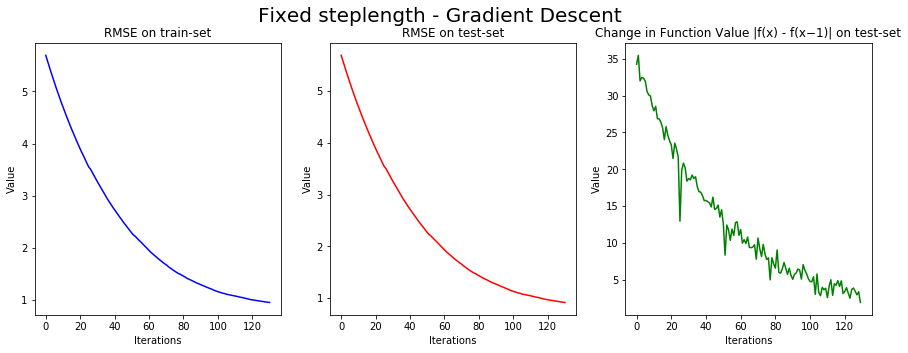

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.001


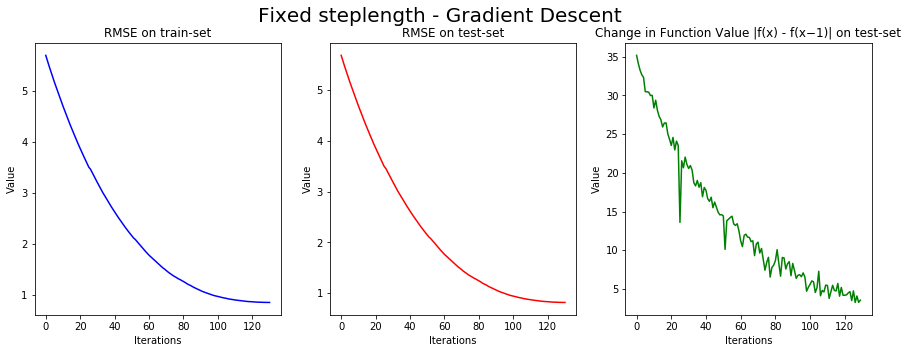

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.01


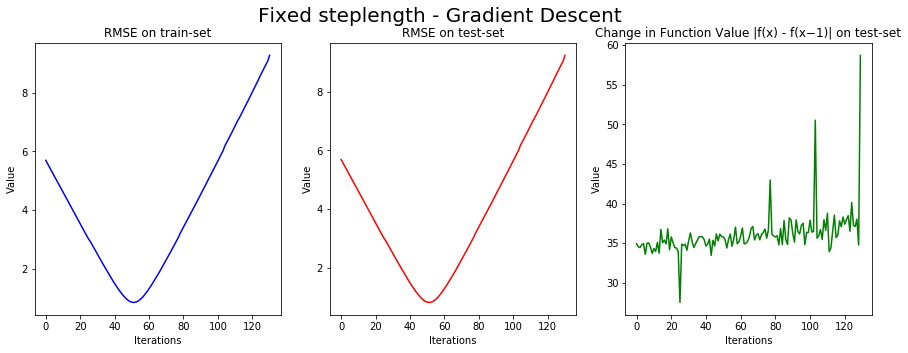

In [25]:
epoch = 5
alpha = [0.01, 0.001, 0.0001]
lambd = [0.0001, 0.001, 0.01]

for i in range(len(alpha)):
    for j in range(len(lambd)):
        print("\033[1m \nWhen Learning Rate = \033[0m", alpha[i], "\033[1m and Regularization Weight, 𝜆 = \033[0m", lambd[j])
        beta, residual, rmse_train_hist, rmse_test_hist = learn_ridgereg_gd(x_train2, 
                                                                            y_train2,    
                                                                            x_test2, 
                                                                            y_test2, 
                                                                            epoch, 
                                                                            alpha[i], 
                                                                            lambd[j])
        
        pred_plot2(rmse_train_hist, rmse_test_hist, residual, "Fixed steplength - Gradient Descent")
        

# 2.6 White Wine Dataset 

Actually the two wine dataset are for intent and purposes equal, the only difference is that this dataset has 4 times the records as the previous one. So the larger training data should help improve the results.

 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.0001


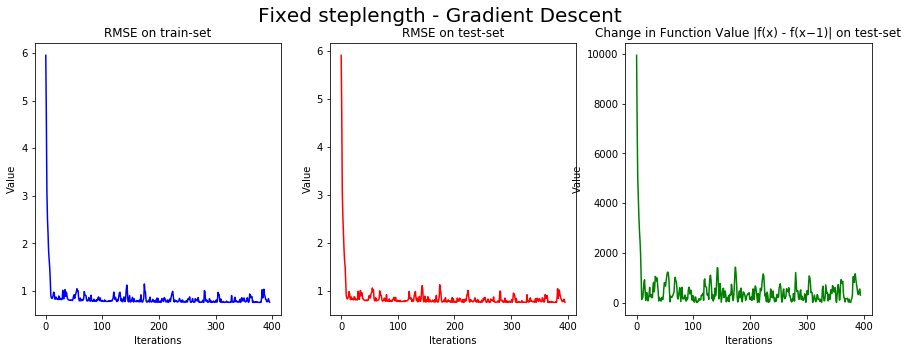

 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.001


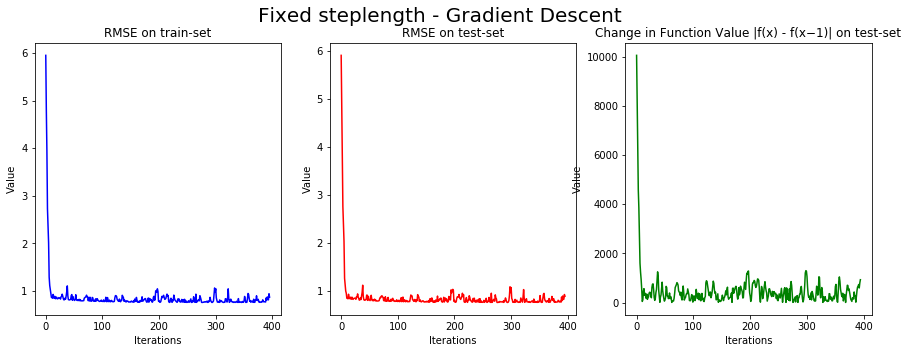

 
When Learning Rate =  0.01  and Regularization Weight, 𝜆 =  0.01


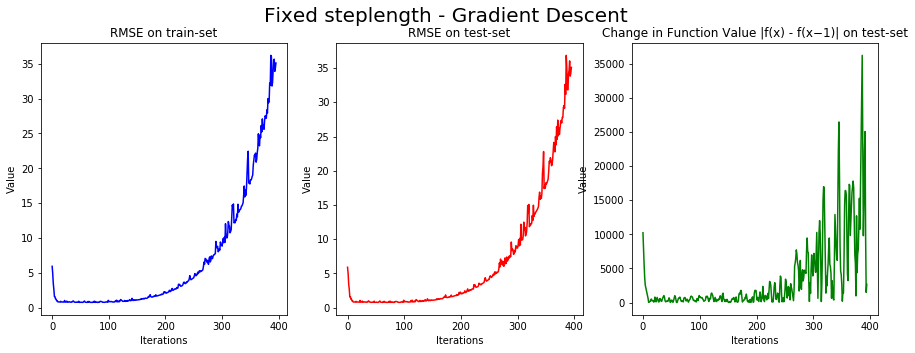

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.0001


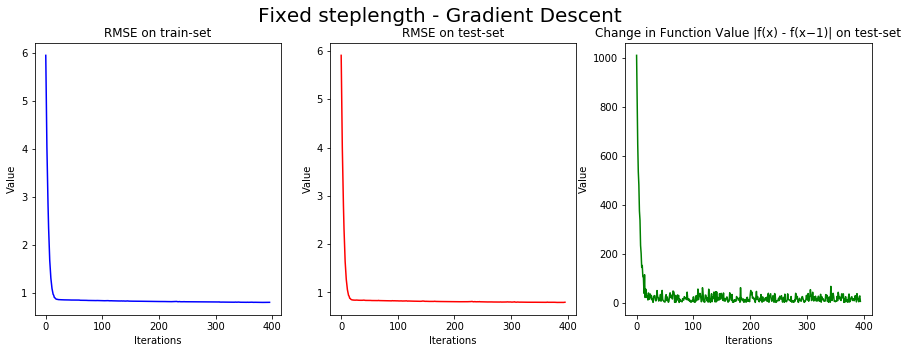

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.001


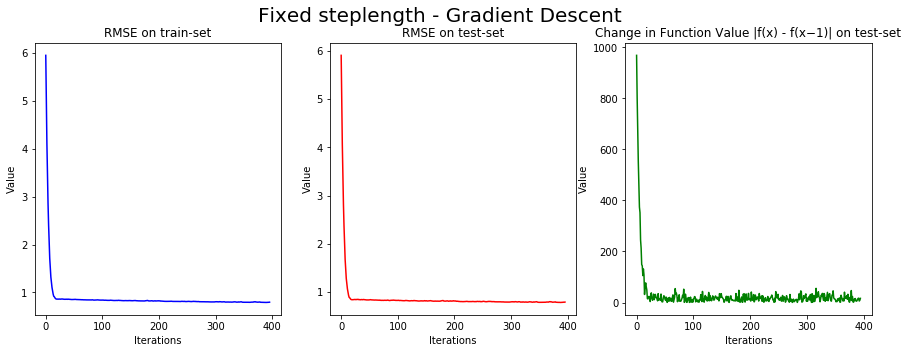

 
When Learning Rate =  0.001  and Regularization Weight, 𝜆 =  0.01


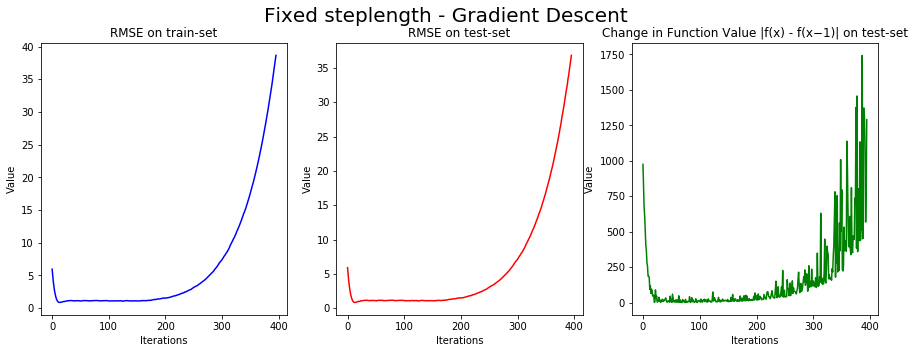

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.0001


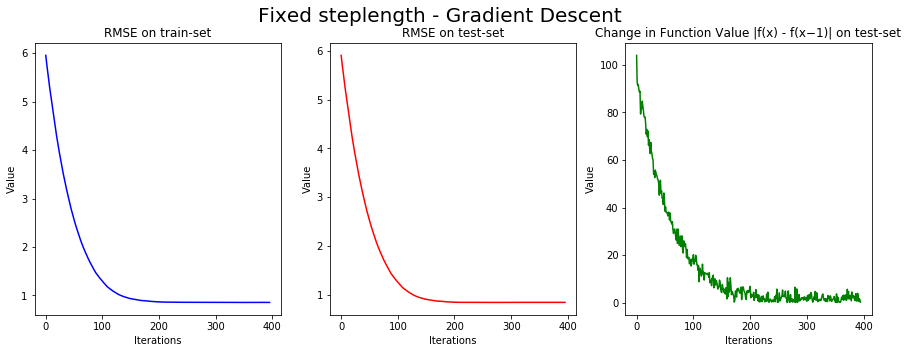

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.001


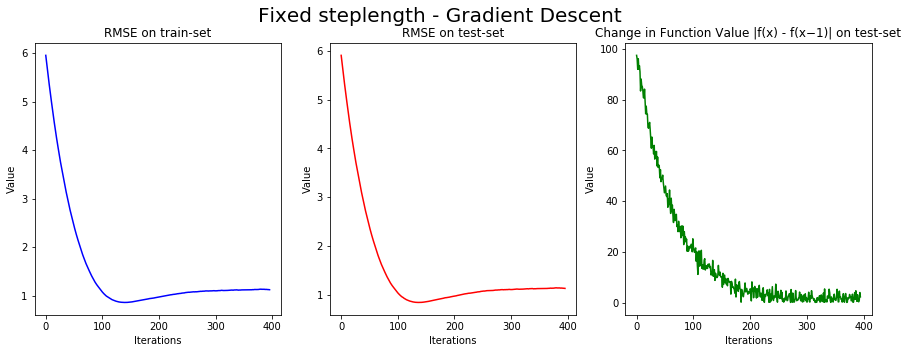

 
When Learning Rate =  0.0001  and Regularization Weight, 𝜆 =  0.01


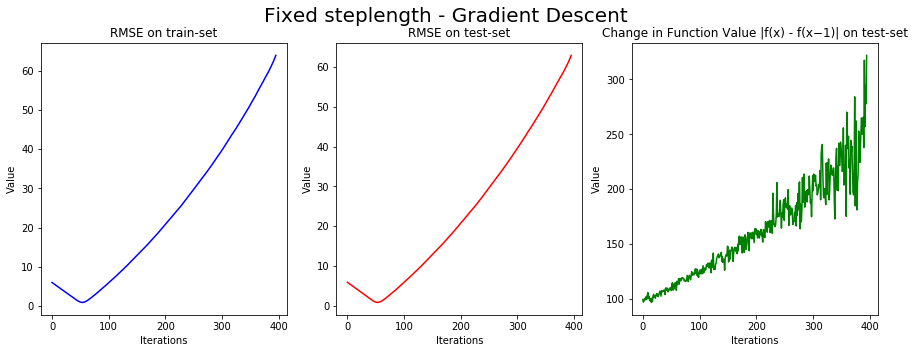

In [26]:
epoch = 5
alpha = [0.01, 0.001, 0.0001]
lambd = [0.0001, 0.001, 0.01]

for i in range(len(alpha)):
    for j in range(len(lambd)):
        print("\033[1m \nWhen Learning Rate = \033[0m", alpha[i], "\033[1m and Regularization Weight, 𝜆 = \033[0m", lambd[j])
        beta, residual, rmse_train_hist, rmse_test_hist = learn_ridgereg_gd(x_train3, 
                                                                            y_train3,    
                                                                            x_test3, 
                                                                            y_test3, 
                                                                            epoch, 
                                                                            alpha[i], 
                                                                            lambd[j])
        
        pred_plot2(rmse_train_hist, rmse_test_hist, residual, "Fixed steplength - Gradient Descent")

* From the plots, we can see that the current hyperparameters giving the best results for lowest RMSE are $\alpha$ =  0.001  and $\lambda$ =  0.0001
* Again, the overriding parameter is the learning rate, as we can see $\alpha$ =  0.0001 will cause the loss to increase as the loss function starts to diverge.
* The erractic change in residuals (function value) is as expected, due to the mini-batch GD. However the general trend is still decreasing.

# 3. Hyper-parameter tuning

As per [8] and [9], the general K-Fold cross-validation for grid-search steps area:

1. Split training data in k sets
2. For each $\alpha_0$, $\lambda$ combination:
    + For k = [0,1...k-1]:
        + Set Validation set to set k
        + Other sets are now training sets
        + Train model for 1 iteration
        + Compute RMSE on validation set
    + Compute Mean RMSE across 5 iterations

### 3.1 Bank Dataset

In [27]:
# Code adapted from [8]
def kfold_cv(df, k):
    df_test = df[k]  # New test set
    x_test, y_test = df_test[0], df_test[1]
    
    df_train = df[:k] + df[k+1:] # New train set
    x_train = np.concatenate((df_train[0][0], df_train[1][0], df_train[2][0], df_train[3][0]))
    y_train = np.concatenate((df_train[0][1], df_train[1][1], df_train[2][1], df_train[3][1]))
    
    return x_train, y_train, x_test, y_test

In [29]:
alpha = [1e-3, 1e-5, 1e-7]
lambd = [1e-5, 1e-6, 1e-8]

folds = 5
ksize = round(len(x_train1)/folds)
a_arr, l_arr, perf_mat = [], [], []

epoch = 2

# Grid search loop, adapted from [11]
for a in range(len(alpha)):
    for l in range(len(lambd)):
        df_folds = get_mini_batches(x_train1, y_train1, ksize)
        l_val = []
        for k in range(5):
            x_tr, y_tr, x_val, y_val = kfold_cv(df_folds, k)
            _, _, ls_train_hist, ls_test_hist, _  = learn_reglogreg_ga(x_tr, y_tr, x_val, y_val, epoch, alpha[a], lambd[l])
            
            l_val.append(ls_train_hist) 
            
        a_arr.append(a)
        l_arr.append(l)
        perf_mat.append(np.mean(l_val))

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


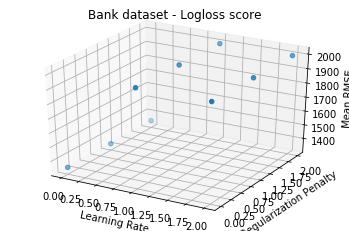

In [30]:
# Adapted from [10]
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(a_arr, l_arr, perf_mat, zdir='z')
ax.set_title('Bank dataset - Logloss score')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Regularization Penalty')
ax.set_zlabel('Mean RMSE')
fig.show()

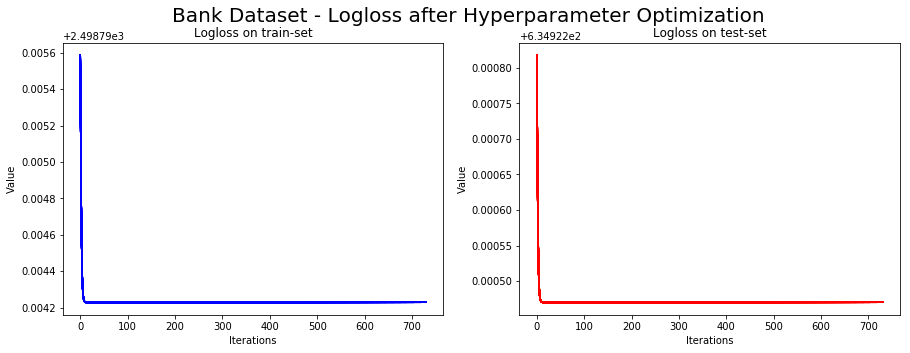

In [31]:
best = np.min(perf_mat)
idx = perf_mat.index(best)
a = alpha[1]
l = lambd[1]
_, _, logloss_train, logloss_test, alpha_hist = learn_reglogreg_ga(x_train1, 
                                                                   y_train1,    
                                                                   x_test1, 
                                                                   y_test1, 
                                                                   10, 
                                                                   a, 
                                                                   l,
                                                                   steplength='Bold_driver')


fig = plt.figure(figsize=(15, 5))
fig.suptitle('Bank Dataset - Logloss after Hyperparameter Optimization', fontsize=20)
    
fig.add_subplot(1,2,1)
plt.plot(logloss_train, color = 'Blue')
plt.title("Logloss on train-set")
plt.xlabel("Iterations")
plt.ylabel("Value")
    
fig.add_subplot(1,2,2)
plt.plot(logloss_test, color = 'Red')
plt.title("Logloss on test-set")
plt.xlabel("Iterations")
plt.ylabel("Value")

plt.show()


We can immediately see that the function converges much smoother and faster as compared to the previous plots. Having said that, the chosen hyperparameter does depend on the initial array given, so we could extend this even further by inputting many values of $\alpha$ and $\lambda$. However this will increase the computation time as well.

### 3.2 Wine Dataset

In [32]:
# Grid search function, adapted from [11]
def grid_search_wine(x_train, y_train, alpha, lambd, epoch, folds):
    
    ksize = round(len(x_train2)/folds)
    a_arr, l_arr, perf_mat = [], [], []

    for a in range(len(alpha2)):
        for l in range(len(lambd2)):
            df_folds = get_mini_batches(x_train2, y_train2, ksize)
            l_val = []
            for k in range(5):
                x_tr, y_tr, x_val, y_val = kfold_cv(df_folds, k)
                _, _, rmse_train_hist, rmse_test_hist  = learn_ridgereg_gd(x_tr, y_tr, x_val, y_val, 
                                                                           epoch, alpha[a], lambd[l])
            
                l_val.append(rmse_train_hist) 
            
            a_arr.append(a)
            l_arr.append(l)
            perf_mat.append(np.mean(l_val))
            
    return a_arr, l_arr, perf_mat

In [33]:
alpha2 = [1e-3, 1e-5, 1e-7]
lambd2 = [1e-5, 1e-6, 1e-8]
epoch = 10
folds = 5
# Red Wine
a_arr2, l_arr2, perf_mat2 = grid_search_wine(x_train2, y_train2, alpha2, lambd2, epoch, folds)

# Red Wine
a_arr3, l_arr3, perf_mat3 = grid_search_wine(x_train3, y_train3, alpha2, lambd2, epoch, folds)

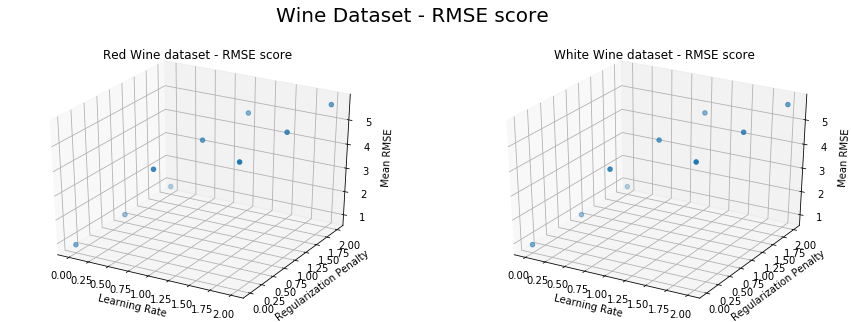

In [34]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Wine Dataset - RMSE score', fontsize=20)
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(a_arr2, l_arr2, perf_mat2, zdir='z')
ax.set_title('Red Wine dataset - RMSE score')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Regularization Penalty')
ax.set_zlabel('Mean RMSE')

ax = fig.add_subplot(1,2,2,projection='3d')
ax.scatter(a_arr3, l_arr3, perf_mat3, zdir='z')
ax.set_title('White Wine dataset - RMSE score')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Regularization Penalty')
ax.set_zlabel('Mean RMSE')

fig.show()

We already know that the dataset is similar. Now we can choose the best hyperparameters to use for the optimal model.

In [35]:
def wine_hpy_optimize(perf_mat, alpha, lambd, x_train, y_train, x_test, y_test, epoch, title):
    
    best = np.min(perf_mat)
    idx = perf_mat.index(best)
    a = alpha[1]
    l = lambd[1]
    _, _, rmse_train_hist, rmse_test_hist = learn_ridgereg_gd(x_train2, y_train2, x_test2, y_test2, epoch, a, l)

    fig = plt.figure(figsize=(15, 5))
    fig.suptitle(title, fontsize=20)
    
    fig.add_subplot(1,2,1)
    plt.plot(rmse_train_hist, color = 'Blue')
    plt.title("RMSE on train-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")
    
    fig.add_subplot(1,2,2)
    plt.plot(rmse_test_hist, color = 'Red')
    plt.title("RMSE on test-set")
    plt.xlabel("Iterations")
    plt.ylabel("Value")

    plt.show()
    
    #return rmse_train_hist, rmse_test_hist


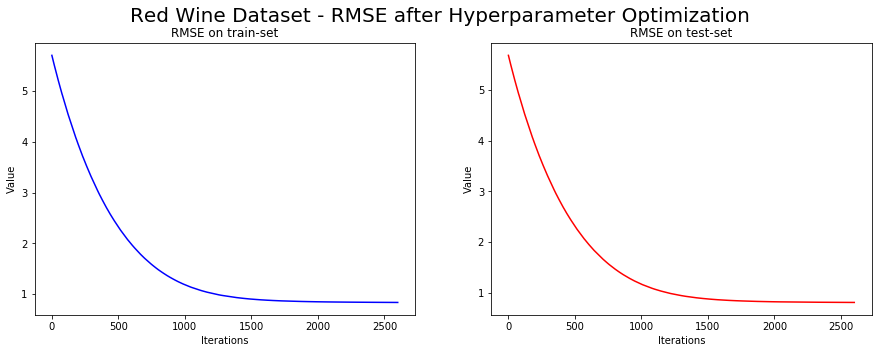

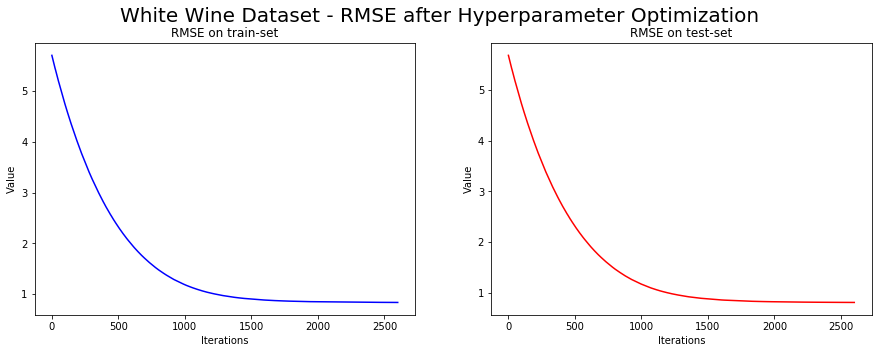

In [36]:
# Use the same alpha and lambda array for both datasets
epoch = 100
wine_hpy_optimize(perf_mat2, alpha2, lambd2, x_train2, y_train2, x_test2, y_test2, epoch, 
            'Red Wine Dataset - RMSE after Hyperparameter Optimization')

wine_hpy_optimize(perf_mat3, alpha2, lambd2, x_train3, y_train3, x_test3, y_test3, epoch, 
            'White Wine Dataset - RMSE after Hyperparameter Optimization')

As expected, the convergence is faster and very smooth. The RMSE is much lower compared to the previous. Also this is only for fixed-step length gradient descent, so implementing step-length controllers such as bold-driver or Adagrad would give even better resuts. Also as mentioned earlier, I input the intial array for $\alpha$ and $\lambda$ which is only of 3 elements each, so have alot more possible choices would yield the most optimum hyperparameter arrangement.

## References

[1] https://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>
[2] http://archive.ics.uci.edu/ml/datasets/Wine+Quality <br>
[3] https://stackoverflow.com/questions/12525722/normalize-data-in-pandas <br>
[4] https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-regularized-logistic-regression-lasso-regression-721f311130fb <br>
[5] https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b <br>
[6] https://stackoverflow.com/questions/38125319/python-divide-by-zero-encountered-in-log-logistic-regression<br>
[7] https://adventuresinmachinelearning.com/stochastic-gradient-descent/ <br>
[8] https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html <br>
[9] https://medium.com/@sebastiannorena/some-model-tuning-methods-bfef3e6544f0 <br>
[10] https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html <br>
[11] https://stackoverflow.com/questions/13370570/elegant-grid-search-in-python-numpy <br>